<a href="https://colab.research.google.com/github/chamithZ/DL-Lab-5/blob/main/IT21156960_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:

# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values

In [3]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [6]:
# Load Data
file_path = '/content/GOOGL.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [7]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [8]:
# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [9]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [10]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:

# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=60, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=60, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:

# 4. Train the Model

model.fit(X_train, y_train, epochs=30, batch_size=42, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 0.0300
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0103
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0093
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0103
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0084
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0078
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0073
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0073
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0074
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0071
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0070
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0069
Epoch 13/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0064
Epoch 14/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 0.0067
Epoch 15/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0065


In [13]:
y_pred = model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [14]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)


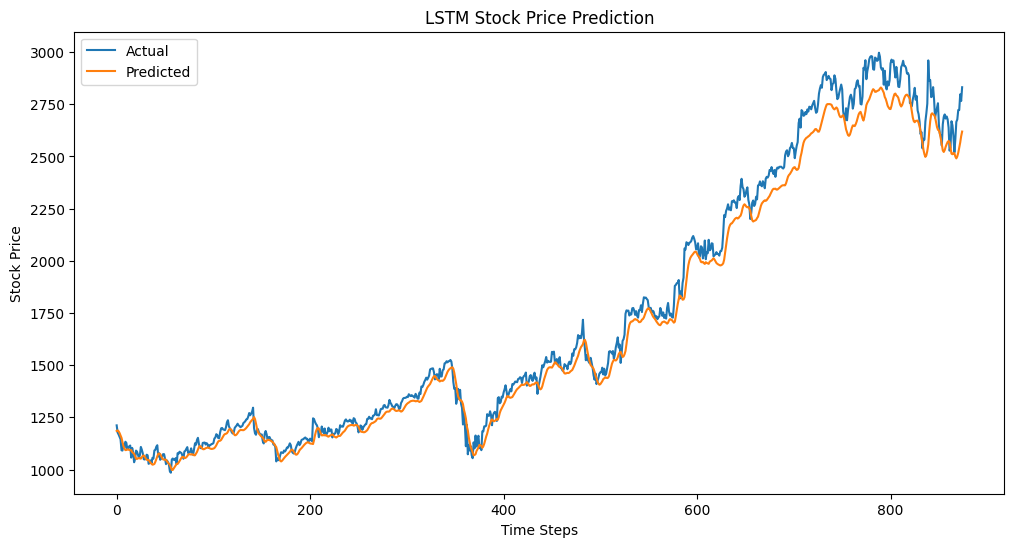

In [15]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


1. What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

Normalization is crucial when feeding data into an LSTM model because it ensures that all input features have a similar scale. Specifically, normalizing the 'Close' prices
Helps to speed up the training process by allowing the model to converge faster.
Reduces the risk of getting stuck in local minima during training.
Improves the overall performance of the model by preventing issues related to different feature scales, which could make the optimization process more difficult.

2. What is the purpose of the Dropout layer in the LSTM model?

The Dropout layer is used in LSTM models to prevent overfitting. It randomly "drops out" (sets to zero) a fraction of the neurons during each forward and backward pass in training. This forces the network to learn more robust features that are not reliant on specific neurons, improving generalization to new data.

3. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

If the predicted line closely follows the actual line, it indicates that the LSTM model has learned to predict the stock prices effectively. The model is able to capture the underlying trends and patterns in the data, resulting in accurate predictions that align well with the actual prices.